In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## DATA COLLECTING


In [2]:
def load_dataset():
    file = ("Visa_For_Lisa_Loan_Modelling.csv")
    df = pd.read_csv(file)
    df.drop('ID', axis = 1, inplace = True)
    return df

load_dataset()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [3]:
def print_summarize_dataset(df):
    print("Data Types:")
    print(df.dtypes)
    print()
    print("Statistical summary:")
    display(df.describe())
    
df = load_dataset()
print_summarize_dataset(df)

Data Types:
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

Statistical summary:


,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


## DATA CLEANING


In [4]:
def clean_dataset(df):
    # Print if there are null values in the dataset
    print(df.isna().any())
    
dataset_cleaned = clean_dataset(df)

Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool


## DATA EXPLORATION

In [5]:
def compute_correlations_matrix(df):
    correlations = df.corr(method='pearson')
    return correlations

compute_correlations_matrix(df)


,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001232,-0.002616,0.004704,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028


## DATA VISUALIZATION

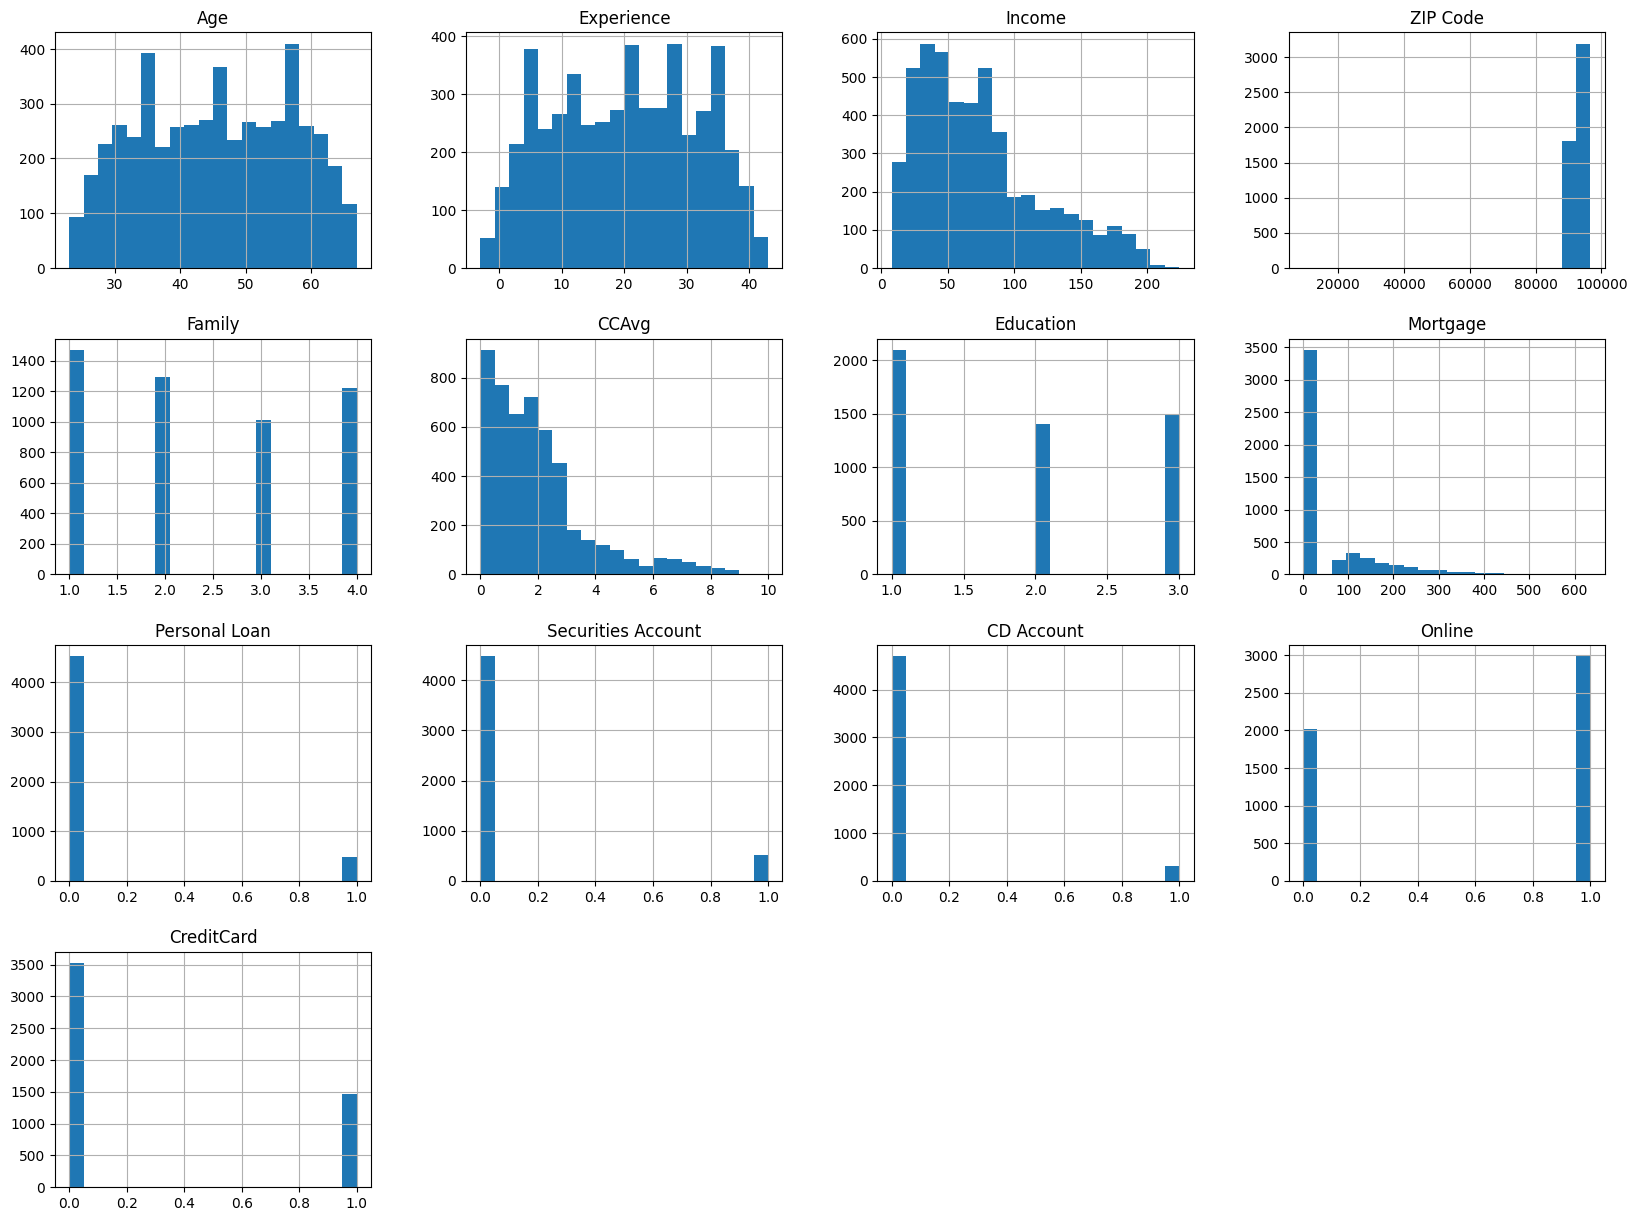

In [6]:
def print_histograms(df):
    figsize = (20, 15)
    df.hist(figsize = figsize, bins = 20)
    plt.show()

print_histograms(df)

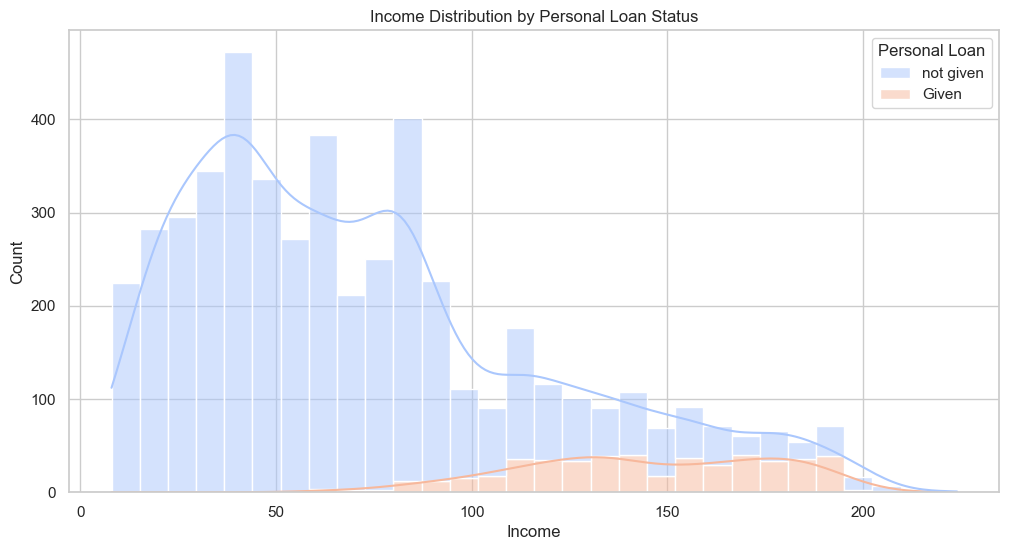

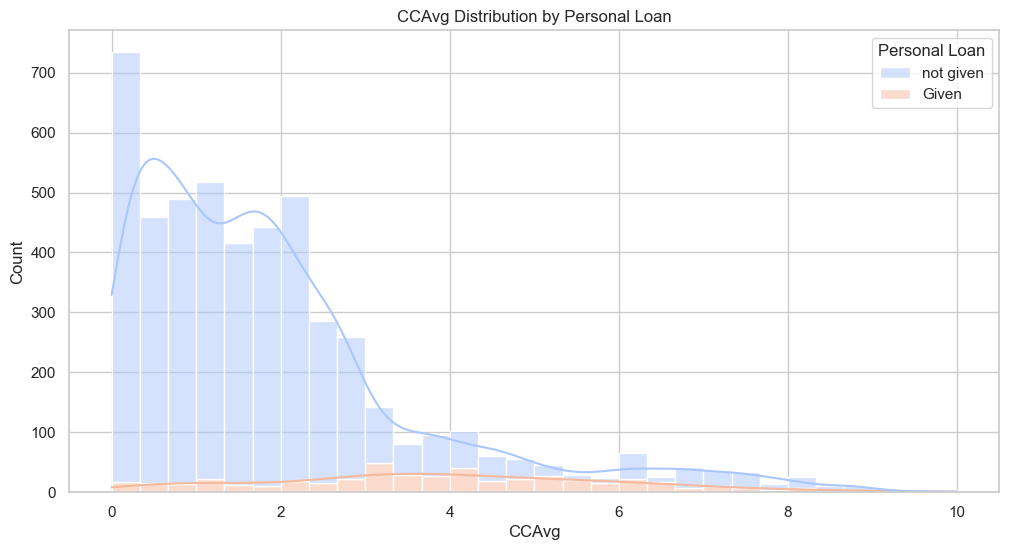

In [7]:
def plot_metrics_by_loan_status(df): 
    # Transform the "Personal Loan" colum
    hue = df['Personal Loan'].replace({1: 'Given', 0: 'not given'})
    sns.set_theme(style='whitegrid')
    
    # 'Income' distribution chart by personal loan status
    plt.figure(figsize=(12, 6))
    sns.histplot(data=df, x='Income', hue=hue, kde=True, multiple='stack', palette='coolwarm', bins=30)
    plt.title('Income Distribution by Personal Loan Status')
    plt.xlabel('Income')
    plt.ylabel('Count')
    plt.show()
    
    # Distribution chart of 'CCAvg' by personal loan status
    plt.figure(figsize=(12, 6))
    sns.histplot(data=df, x='CCAvg', hue=hue, kde=True, multiple='stack', palette='coolwarm', bins=30)
    plt.title('CCAvg Distribution by Personal Loan')
    plt.xlabel('CCAvg')
    plt.ylabel('Count')
    plt.show()
    
plot_metrics_by_loan_status(df)

### From these charts, we can observe that the customers who accepted the personal loan offered tend to have higher incomes.

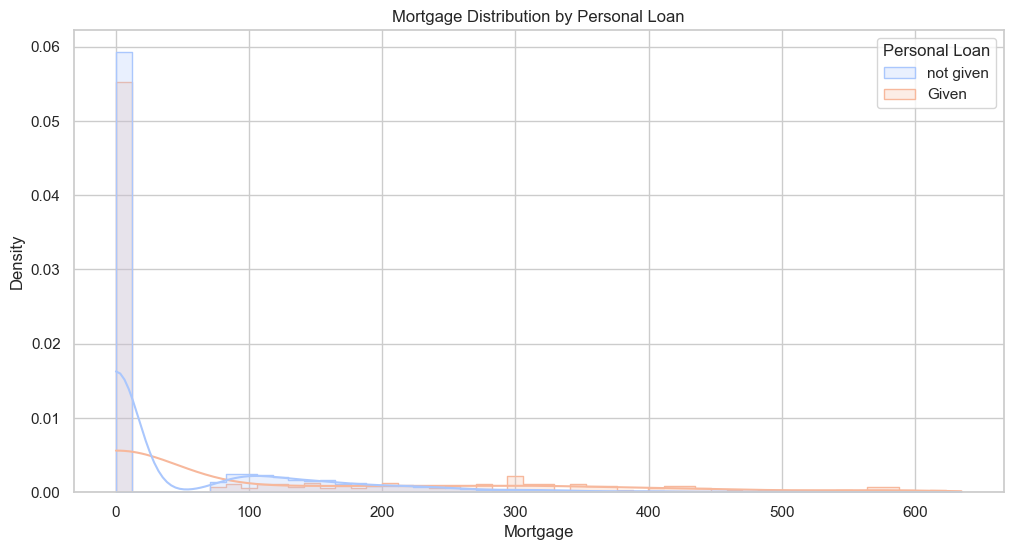

In [8]:
def plot_mortgage_distribution(df):
    # Transform the "Personal Loan" colum
    hue = df['Personal Loan'].replace({1: 'Given', 0: 'not given'})
    sns.set_theme(style='whitegrid')
    
    # Plot Mortgage Distribution by Personal Loan
    plt.figure(figsize=(12, 6))
    sns.histplot(data=df, x='Mortgage', hue=hue, palette='coolwarm', kde=True, element='step', stat='density', common_norm=False)
    plt.title('Mortgage Distribution by Personal Loan')
    plt.xlabel('Mortgage')
    plt.ylabel('Density')
    plt.show()
    
plot_mortgage_distribution(df)

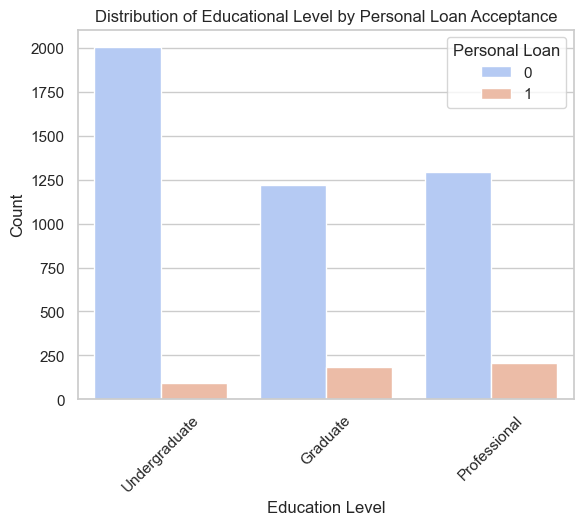

In [9]:
def plot_education(df):
    # Plot
    sns.countplot(data=df, x='Education', hue='Personal Loan', palette='coolwarm')
    
    # Adjust the tick labels to match the names of the education levels.
    plt.xticks(np.arange(3), ['Undergraduate', 'Graduate', 'Professional'], rotation=45)
    s
    plt.title("Distribution of Educational Level by Personal Loan Acceptance")
    plt.xlabel("Education Level")
    plt.ylabel("Count")

    plt.show()
    
plot_education(df)

### From this result, we can observe that customers with graduate and advanced education levels tend to have a higher likelihood of getting a personal loan compared to customers with an undergraduate education level.

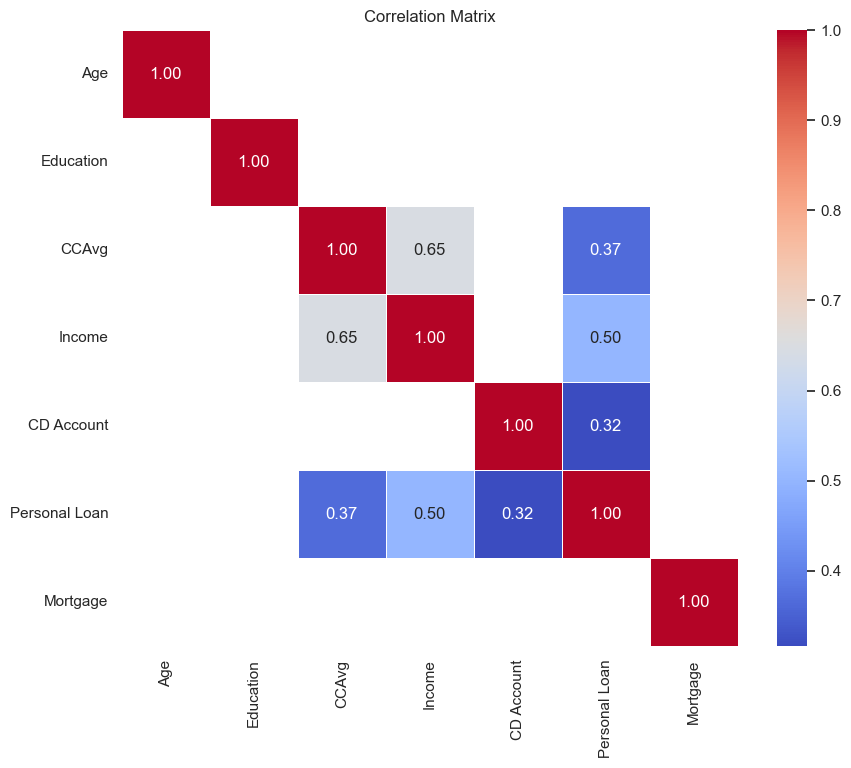

In [10]:
def correlations_matrix(df):
    colums = ['Age', 'Education', 'CCAvg', 'Income', 'CD Account', 'Personal Loan', 'Mortgage']
    correlations = df[colums].corr(method='pearson')
    
    # Establish a threshold for significant correlations
    umbral = 0.3
    # Create a mask to hide correlations below the threshold
    mascara = np.abs(correlations) < umbral
    
    # create heatmap using seaborn
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlations, mask=mascara, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)
    
    plt.title("Correlation Matrix")
    plt.show()

correlations_matrix(df)

### As can be seen, there are strong correlations between income and personal loan, CCAvg and personal loan, etc

## MACHINE LEARNING

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

### Logistic Regression (LogisticRegression)
### Decision Tree (DecisionTreeClassifier)
### Random Forest (RandomForestClassifier)
### Gradient Boosting (GradientBoostingClassifier)
### Gaussian Naive Bayes (GaussianNB)
### Support Vector Machines (SVC)
### K Nearest Neighbors (KNeighborsClassifier)
### We will develop a Python class that encapsulates the functionality to train these models, make predictions, and evaluate their performance. This class will include methods for fitting the models, predicting loan acceptance probabilities, and generating evaluation metrics such as accuracy, confusion matrix, and area under the ROC curve (AUC).


In [12]:
class BankLoanModel:
    def __init__(self, df):
        # Initialises the class, prepares the dataset and models for training
        self.df = df
        self.models = {
            'LogisticRegression': LogisticRegression(max_iter=1000),
            'DecisionTree': DecisionTreeClassifier(),
            'RandomForest': RandomForestClassifier(),
            'GradientBoosting': GradientBoostingClassifier(),
            'GaussianNB': GaussianNB(),
            'SVC': SVC(probability=True),
            'KNeighbors': KNeighborsClassifier()
        }
        self.X_train, self.X_test, self.y_train, self.y_test = self.prepare_data()
        self.results = {}

    def prepare_data(self):
        # Divide the data into training and test sets
        X = self.df[['Income', 'CCAvg', 'CD Account', 'Education', 'Mortgage']]
        y = self.df['Personal Loan']
        return train_test_split(X, y, test_size=0.2, random_state=42)

    def train_and_evaluate(self):
        # Train each model with the training data and evaluate its performance on the test set
        for name, model in self.models.items():
            model.fit(self.X_train, self.y_train)
            y_pred = model.predict(self.X_test)
            accuracy = accuracy_score(self.y_test, y_pred)
            conf_matrix = confusion_matrix(self.y_test, y_pred)
            auc = roc_auc_score(self.y_test, model.predict_proba(self.X_test)[:, 1])
            self.results[name] = {'Accuracy': accuracy, 'Confusion Matrix': conf_matrix, 'AUC': auc}

    def get_results(self):
        return self.results

loan_model = BankLoanModel(df)
loan_model.train_and_evaluate()
results = loan_model.get_results()
print(results)

{'LogisticRegression': {'Accuracy': 0.95, 'Confusion Matrix': array([[885,  10],
       [ 40,  65]]), 'AUC': 0.9647459430699654}, 'DecisionTree': {'Accuracy': 0.965, 'Confusion Matrix': array([[874,  21],
       [ 14,  91]]), 'AUC': 0.9214525139664804}, 'RandomForest': {'Accuracy': 0.981, 'Confusion Matrix': array([[888,   7],
       [ 12,  93]]), 'AUC': 0.9891407289172652}, 'GradientBoosting': {'Accuracy': 0.978, 'Confusion Matrix': array([[889,   6],
       [ 16,  89]]), 'AUC': 0.9919819100824687}, 'GaussianNB': {'Accuracy': 0.894, 'Confusion Matrix': array([[831,  64],
       [ 42,  63]]), 'AUC': 0.9386858206969939}, 'SVC': {'Accuracy': 0.898, 'Confusion Matrix': array([[891,   4],
       [ 98,   7]]), 'AUC': 0.9423463687150837}, 'KNeighbors': {'Accuracy': 0.933, 'Confusion Matrix': array([[876,  19],
       [ 48,  57]]), 'AUC': 0.9238361266294226}}


### BankLoanModel Class: This class encapsulates the entire process from data loading to the evaluation of multiple classification models..
### prepare_data Method: Loads the dataset, selects features and the target variable, and splits the dataset into training and testing data.
### train_and_evaluate Method: Trains each model with the training set and evaluates its performance on the test set. Calculates and stores accuracy, confusion matrix, and AUC for each model.
### get_results Method: Returns the evaluation results of all models.

Interpretation of the Results:
LogisticRegression: Shows high accuracy (0.95) and good discrimination capability (AUC of 0.964), although it has a moderate amount of false negatives.
DecisionTree: Has slightly higher accuracy than logistic regression (0.965) but a lower AUC, indicating that, although accurate, it might not be as good at discriminating between classes at different thresholds.
RandomForest: Offers the best balance between accuracy (0.981) and AUC (0.989), suggesting excellent performance in both overall classification and discrimination capability.
GradientBoosting: Also shows very high performance, with accuracy and AUC close to RandomForest, indicating excellent prediction and discrimination capability.
GaussianNB: Presents the lowest accuracy (0.894) and competitive AUC, suggesting that, although it has good discrimination capability, it makes more errors in overall classification.
SVC: Has reasonable accuracy (0.898) but shows a large number of false negatives, affecting its ability to correctly predict the positive class.
KNeighbors: Exhibits decent accuracy (0.933) with moderate AUC, indicating overall good performance but with room for improvement in class discrimination.
In summary, RandomForest and GradientBoosting models show the best performance according to these results, with high scores in both accuracy and AUC, indicating a strong ability to correctly classify and discriminate between customers who will or will not accept a personal loan.